In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn
from io import BytesIO
plt.style.use('ggplot')
seaborn.set_context('talk')
%matplotlib inline

In [2]:
t=np.arange(1800,2100)
def norm_cdf(x,l=1830,asi=10,k=0.03):
    return asi/(1+np.exp(-k*(x-l)))
def normal(x,year=1940,scale=3):
    y=(x-year)/scale
    return np.exp(-y**2/2)/np.sqrt(2*np.pi)

In [3]:
x=[1]
for pos,i in enumerate(t):
    growth=0.01
    if i>1950:
        growth*=1.1
    x.append(x[pos]*(1+growth))
x=x[:-1]
x=np.array(x)

noise=np.random.normal(size=(t.shape),scale=1.1)
norm=normal(t,scale=10)*2+normal(t,year=2010,scale=10)*5
x2=x+noise+norm



norm_cdfs=norm_cdf(t)+norm_cdf(t,l=2000,k=0.1,asi=5)

x3=x2+norm_cdfs


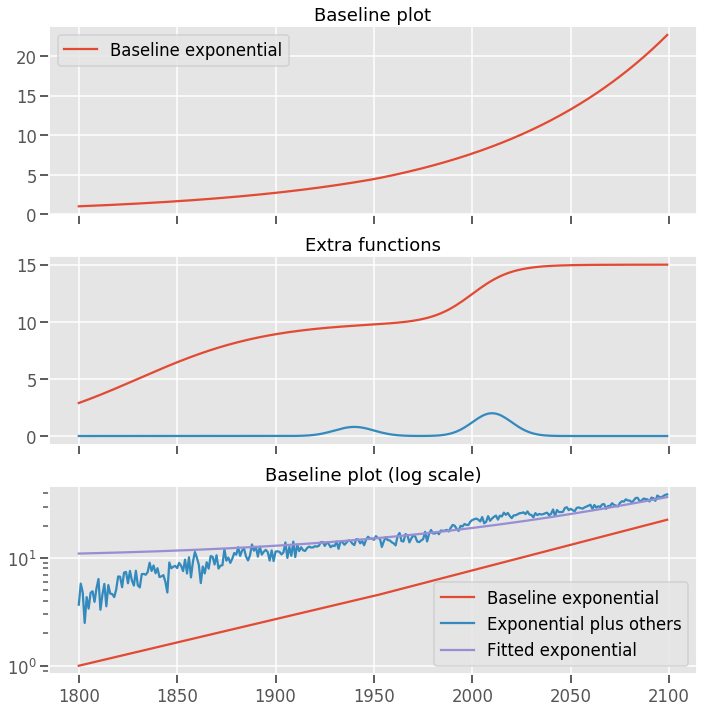

In [4]:
plt.figure(figsize=(10,10))
ax1=plt.subplot(3,1,1)
plt.title('Baseline plot')
plt.plot(t,x,label='Baseline exponential')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()


ax2=plt.subplot(3,1,2,sharex=ax1)
plt.title('Extra functions')
plt.plot(t,norm_cdfs)
plt.plot(t,norm)

plt.setp(ax2.get_xticklabels(), visible=False)


plt.subplot(3,1,3,sharex=ax1)
plt.title('Baseline plot (log scale)')
plt.plot(t,x,label='Baseline exponential')
plt.plot(t,x3,label='Exponential plus others')


fitted=np.exp(0.011*(t-t[0]))+10
plt.plot(t,fitted,label='Fitted exponential')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('exponential_dominance.png')

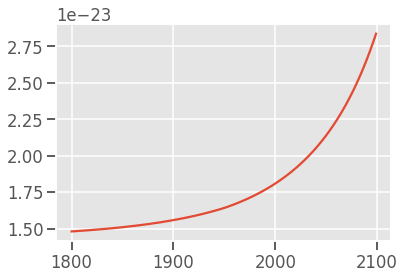

In [5]:
plt.plot(t,norm_cdf(x))

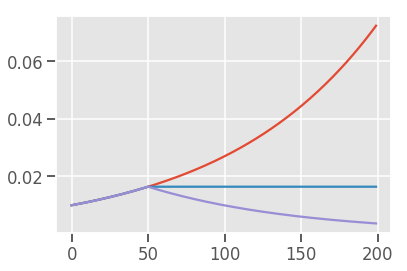

In [19]:
t=np.arange(0,200)
def grow_r(t,how):
    if how=='grow':
        return 1.01
    elif how=='constant':
        return 1.01 if t<50 else 1
    else:
        return 1.01 if t<50 else 0.99
def growth_fun(how='grow'):
    g=[0.01]
    
    for i in t:
        f=grow_r(t[i],how)
        g.append(g[i]*f)
    return np.array(g[:-1])
plt.plot(t,growth_fun('grow'))
plt.plot(t,growth_fun('constant'))
plt.plot(t,growth_fun('down'))

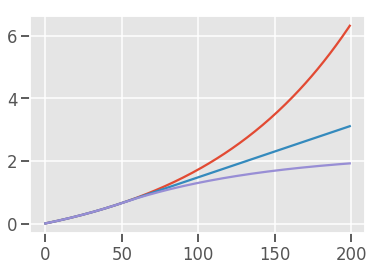

In [20]:
plt.plot(t,growth_fun('grow').cumsum())
plt.plot(t,growth_fun('constant').cumsum())
plt.plot(t,growth_fun('down').cumsum())